## Naive-Bayes

### Task 1 - Bayesian Classification

1. In a study of pleas and prison sentences, it is reported that 42% of the subjects were sent to prison. Among those sent to prison, 38% plead guilty. Among those not sent to prison, 50% plead guilty.<br>
&emsp;a) If a subject is randomly selected, what is the probability of getting a person who was not sent to prison? <br>
&emsp;b) If a subject is randomly selected, and it is known that the subject entered a quilty plea, what is the probability that this subject was not sent to prison? <br>
&emsp;c) If a subject is randomly selected, what is the probability of getting someone who was sent to prison?<br>
&emsp;d) If a subject is randomly selected, and it is known that the subject entered a guilty plea, what is the probability that this person was sent to prison?



# Bayes Theorem:
The probability of event A, given that event B has subsequently occurred can be defined as 

$$
P(A~|~B) = \frac{P(A) \cdot P(B~|~A)}{(~P(A) \cdot P(B~|A~)~) + (~P(A') \cdot P(B~|A'~)~)}
$$

**Note:** P(A')denotes P(not A) and the same applies for P(B').


# What we know at this point
&emsp;&emsp;Let **A** be the event of **sent to prison**.

$$ P(A) = .42 $$

$$ P(A') = .58 $$

 Let **B** be the event of **entering a quilty plea**.

#Continue defining the probabilites and compute b-d

$$
P(A|B) = \frac{P(A) \cdot P(B|A)}{(P(A) \cdot P(B|A)~) + (P(A') \cdot P(B|A'))}
$$
$$
P(A|B) = \frac{P(A \cap B)}{P(B)} ~where~ P(A \cap B) = P(A) \cdot P(B|A)
$$
$$
P(B) = P(A) \cdot P(B|A) + P(A') \cdot P(B|A')
$$
$$ 
P(A|B) => Conditional~ probability ~of ~event ~A ~given ~event ~B 
$$
$$ P(A \cap B)
=> Probability ~intersection ~event ~A ~and ~event ~B 
$$ 
$$ 
P(B) => Probability ~of ~event ~B 
$$
$$ 
P(A) => Probability ~of ~event ~A 
$$
$$ 
P(B|A) => Conditional~ probability ~of ~event ~B ~given ~event ~A 
$$
$$ 
P(A') => Probability ~of ~complement ~event ~A 
$$
$$ 
P(B|A') => Conditional~ probability ~of ~event ~B ~given ~complement ~event ~A 
$$

In [65]:
# we know P(A) = P(sent to prison) = .42 (it occurs 42% of the time) subject were sent to prison
# we know P(A') = P(not sent to prison) = .58 (it did not occur 58% of the time) subject were not sent to prison
# we know P(B|A) = P(pleaded guilty|sent to prison) = .38 (it occurs 38% of the time) subject pleaded guilty
# we know P(B'|A) = P(pleaded not guilty|sent to prison) = .62 (it did not occur 62% of the time) subject pleaded not guilty
# P(B|A') =  P(pleaded guilty|not sent to prison) = .50 (it occurs 50% of the time) subject pleaded guilty


In [66]:
# a = P(A') = 1 - P(A) = .58
a = 1 - .42
print("Answer a => P(A'): ", a)


Answer a => P(A'):  0.5800000000000001


In [67]:

# b =P(A'|B) = P(A') * P(B|A') / P(B) => 
# P(not sent to prison|pleaded guilty) 
# =  P(not sent to prison) * P(pleaded guilty|not sent to prison) / P(pleaded guilty) 
# = .58 * .50 / X => 
# X = P(B) = P(pleaded guilty) = P(A) * P(B|A) + P(A') * P(B|A') =>
# P(sent to prison) * P(pleaded guilty|sent to prison) 
# + P(not sent to prison) * P(pleaded guilty|not sent to prison) =>
X = .42 * .38 + .58 * .50
print('P(B): ', X)
b = (.58 * .50) / X
print("Answer b =>P(A'|B): ", b)


P(B):  0.4496
Answer b =>P(A'|B):  0.645017793594306


In [68]:
# c = P(A) = .42
c = .42
print('Answer c => P(A): ', c)


Answer c => P(A):  0.42


In [69]:
# d = P(A|B) = P(A) * P(B|A) / P(B) =>
# P(B) = X on question b
print(X)
d = .42 * .38 / X
print('Answer d => P(A): ', d)


0.4496
Answer d => P(A):  0.35498220640569395


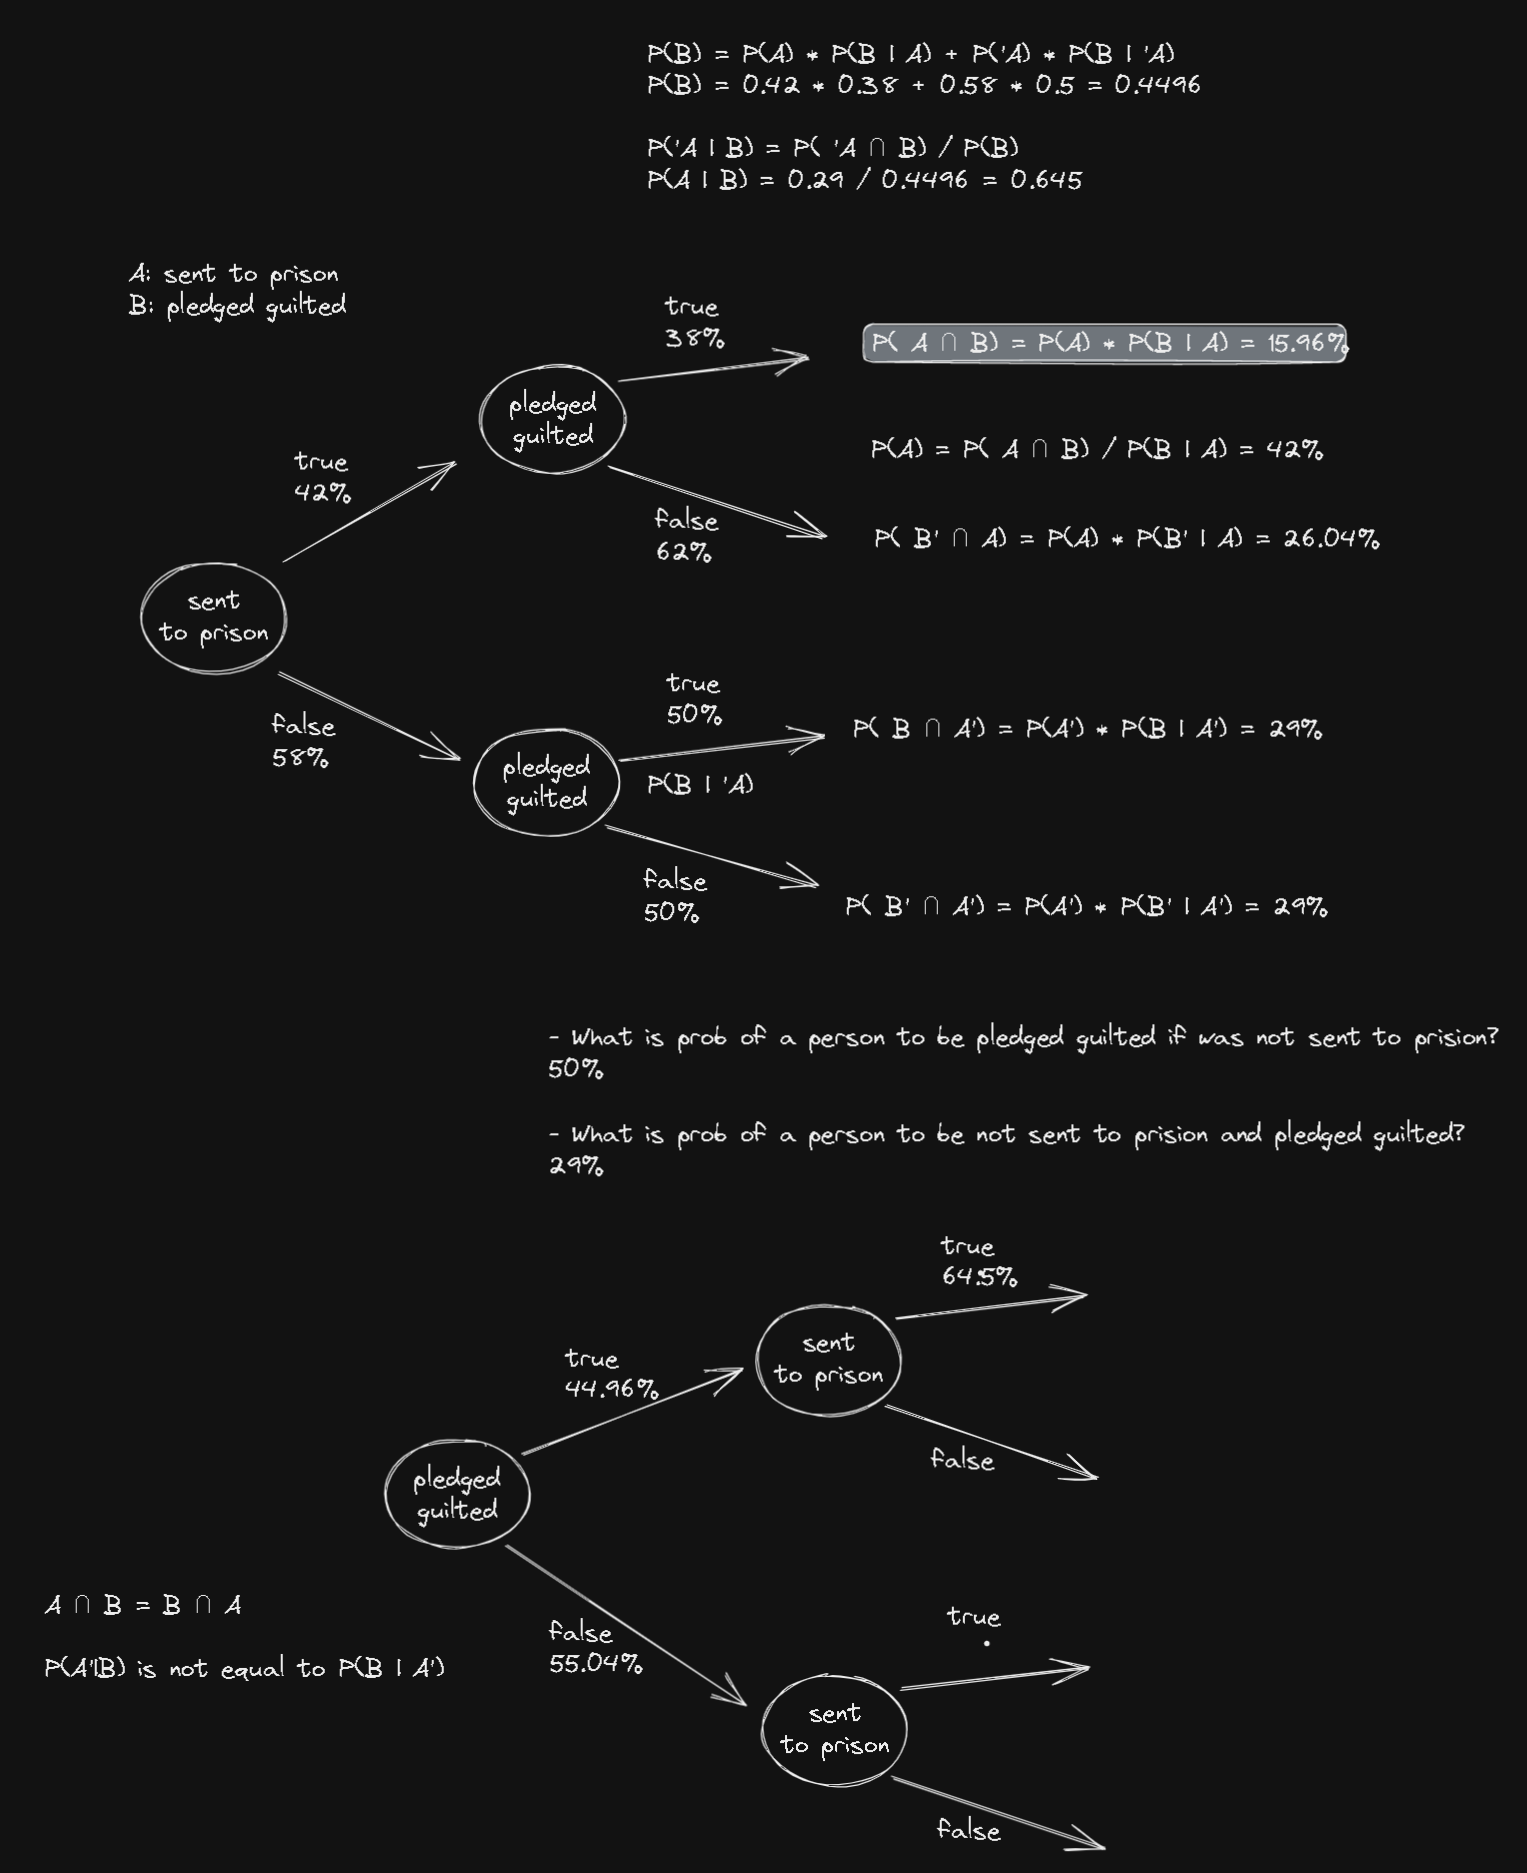

2. Given the following table:

|Customer ID| Gender  |Car Type|Shirt Size |Class|
|:---------:|:-------:|:------:|:---------:|:---:|
|1          |M        |Family  |Small      |CO   |
|2          |M        |Sports  |Medium     |CO   |
|3          |M        |Sports  |Medium     |CO   |
|4          |M        |Sports  |Large      |CO   |
|5          |M        |Sports  |Extra Large|CO   |
|6          |M        |Sports  |Extra Large|CO   |
|7          |F        |Sports  |Small      |CO   |
|8          |F        |Sports  |Small      |CO   |
|9          |F        |Sports  |Medium     |CO   |
|10         |F        |Luxury  |Large      |CO   |
|11         |M        |Family  |Large      |C1   |
|12         |M        |Family  |Extra Large|C1   |
|13         |M        |Family  |Medium     |C1   |
|14         |M        |Luxury  |Extra Large|C1   |
|15         |F        |Luxury  |Small      |C1   |
|16         |F        |Luxury  |Small      |C1   |
|17         |F        |Luxury  |Medium     |C1   |
|18         |F        |Luxury  |Medium     |C1   |
|19         |F        |Luxury  |Medium     |C1   |
|20         |F        |Luxury  |Large      |C1   |<br>

&emsp;a) What is the value of each of the following probabilities?<br>
&emsp;   - P(Gender=M | Class=C0)<br>
&emsp;   - P(Gender=F | Class=C1)<br>
&emsp;   - P(Car Type=Family | Class=C0)<br>
&emsp;   - P(Car Type=Family | Class=C1)<br>
&emsp;   - P(Shirt Size=Medium | Class=C0)<br>
&emsp;   - P(Shirt Size=Medium | Class=C1)<br>
<br>
&emsp;b) Use Naive Bayes Classifier to find the class of P(Gender=F | Car Type=Family| Shirt Size=Medium)



In [70]:
import pandas as pd

data = {
        'Gender': ['M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F'],
        'Car Type': ['Family', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Luxury', 'Family', 'Family', 'Family', 'Luxury', 'Luxury', 'Luxury', 'Luxury', 'Luxury', 'Luxury', 'Luxury'],
        'Shirt Size': ['Small', 'Medium', 'Medium', 'Large', 'Extra Large', 'Extra Large', 'Small', 'Small', 'Medium', 'Large', 'Large', 'Extra Large', 'Medium', 'Extra Large', 'Small', 'Small', 'Medium', 'Medium', 'Medium', 'Large'],
        'Class': ['CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']}

df = pd.DataFrame(data)
df.head()


,Gender,Car Type,Shirt Size,Class
0,M,Family,Small,CO
1,M,Sports,Medium,CO
2,M,Sports,Medium,CO
3,M,Sports,Large,CO
4,M,Sports,Extra Large,CO


In [71]:
gender_count = df['Gender'].value_counts()
gender_count

M    10
F    10
Name: Gender, dtype: int64

In [72]:
male_count = gender_count.loc['M']
male_count

10

In [73]:
df['Gender'].value_counts(normalize=True)

M    0.5
F    0.5
Name: Gender, dtype: float64

In [74]:
df.shape, male_count/df.shape[0]


((20, 4), 0.5)

In [75]:
df['Gender'].isnull().sum(), df['Gender'].isna().sum(), df.isna().sum(), df.isnull().sum()

(0,
 0,
 Gender        0
 Car Type      0
 Shirt Size    0
 Class         0
 dtype: int64,
 Gender        0
 Car Type      0
 Shirt Size    0
 Class         0
 dtype: int64)

In [76]:
car_type_counts = df['Car Type'].value_counts()
total_customers = df.shape[0]

for car_type in car_type_counts.index:
    car_type_count = car_type_counts.loc[car_type]
    probability = car_type_count / total_customers
    print(f"Probability of selecting a {car_type} car: {probability}")

Probability of selecting a Sports car: 0.4
Probability of selecting a Luxury car: 0.4
Probability of selecting a Family car: 0.2


In [77]:
categories = ['Gender', 'Car Type', 'Shirt Size', 'Class']
for category in categories:
  print(category)
  print('--------------')
  print(df[category].value_counts())

Gender
--------------
M    10
F    10
Name: Gender, dtype: int64
Car Type
--------------
Sports    8
Luxury    8
Family    4
Name: Car Type, dtype: int64
Shirt Size
--------------
Medium         7
Small          5
Large          4
Extra Large    4
Name: Shirt Size, dtype: int64
Class
--------------
CO    10
C1    10
Name: Class, dtype: int64


In [78]:
# probabilities = df.groupby(categories).size()/len(df)
# probabilities = probabilities.to_dict()
# print(probabilities)

In [92]:

total_customers = df.shape[0]
probabilities = {}

for category in categories:
    category_counts = df[category].value_counts()
    for cat in category_counts.index:
        cat_count = category_counts.loc[cat]
        # item divided by total items in the dataset (df.shape[0]) 
        # gives us the probability of selecting that item
        probability = cat_count / total_customers
        key = f"P({category}={cat})"
        probabilities[key] = probability
print(probabilities)


{'P(Gender=M)': 0.5, 'P(Gender=F)': 0.5, 'P(Car Type=Sports)': 0.4, 'P(Car Type=Luxury)': 0.4, 'P(Car Type=Family)': 0.2, 'P(Shirt Size=Medium)': 0.35, 'P(Shirt Size=Small)': 0.25, 'P(Shirt Size=Large)': 0.2, 'P(Shirt Size=Extra Large)': 0.2, 'P(Class=CO)': 0.5, 'P(Class=C1)': 0.5}


In [80]:
#P(Gender = M) = 0.50
#P(Gender = F) = 0.50
for cat, prob in probabilities.items():
    print(f"{cat}: {prob}")

P(Gender=M): 0.5
P(Gender=F): 0.5
P(Car Type=Sports): 0.4
P(Car Type=Luxury): 0.4
P(Car Type=Family): 0.2
P(Shirt Size=Medium): 0.35
P(Shirt Size=Small): 0.25
P(Shirt Size=Large): 0.2
P(Shirt Size=Extra Large): 0.2
P(Class=CO): 0.5
P(Class=C1): 0.5


In [81]:
#calculate_probability(probabilities['P(Gender=M)'],probabilities['P(Class=CO)'])
# I could build a function to calculate the probability of a given event(if more time)


In [82]:
results = {} # dictionary to store the results 'P(Gender=M|Class=C0)':

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

In [83]:
intersections = {}
# find intersections of two events (A and B) / P(B) = P(A ⋂ B) / P(B)
# P(Gender=M ⋂ Class=CO)': df.query('Gender == "M" & Class == "CO"').shape[0]
inter = intersections['P(Gender=M ⋂ Class=CO)'] = df.query('Gender == "M" & Class == "CO"').shape[0] / df.shape[0]
#divide by P(Class=CO)
# P(Class=CO)': df.query('Class == "CO"').shape[0]
prob = probabilities['P(Class=CO)']
results['P(Gender=M|Class=CO)'] =  inter / prob
results['P(Gender=M|Class=CO)']


0.6

In [84]:
inter = intersections['P(Gender=F ⋂ Class=C1)'] = df.query('Gender == "F" & Class == "C1"').shape[0] / df.shape[0]
prob = probabilities['P(Class=C1)']
results['P(Gender=F|Class=C1)'] =  inter / prob


In [85]:
#
inter = intersections['P(Car Type=Family ⋂ Class=CO)'] = df.query('`Car Type` == "Family" & Class == "CO"').shape[0] / df.shape[0]
prob = probabilities['P(Class=CO)']
results['P(Car Type=Family|Class=CO)'] =  inter / prob


In [86]:
inter = intersections['P(Car Type=Family ⋂ Class=C1)'] = df.query('`Car Type` == "Family" & Class == "C1"').shape[0] / df.shape[0]
prob = probabilities['P(Class=C1)']
results['P(Car Type=Family|Class=C1)'] =  inter / prob


In [87]:
inter = intersections['P(Shirt Size=Medium ⋂ Class=CO)'] = df.query('`Shirt Size` == "Medium" & Class == "CO"').shape[0] / df.shape[0]
prob = probabilities['P(Class=CO)']
results['P(Shirt Size=Medium|Class=CO)'] =  inter / prob


In [88]:
inter = intersections['P(Shirt Size=Medium ⋂ Class=C1)'] = df.query('`Shirt Size` == "Medium" & Class == "C1"').shape[0] / df.shape[0]
prob = probabilities['P(Class=C1)']
results['P(Shirt Size=Medium|Class=C1)'] =  inter / prob
results

{'P(Gender=M|Class=CO)': 0.6,
 'P(Gender=F|Class=C1)': 0.6,
 'P(Car Type=Family|Class=CO)': 0.1,
 'P(Car Type=Family|Class=C1)': 0.3,
 'P(Shirt Size=Medium|Class=CO)': 0.3,
 'P(Shirt Size=Medium|Class=C1)': 0.4}

In [89]:
# another way to calculate the probability of a given event
df[(df['Gender'] == 'M') & (df['Class'] == 'CO')].shape[0]

6

&emsp;a) What is the value of each of the following probabilities?<br>
&emsp;   - P(Gender=M | Class=C0)<br>
&emsp;   - P(Gender=F | Class=C1)<br>
&emsp;   - P(Car Type=Family | Class=C0)<br>
&emsp;   - P(Car Type=Family | Class=C1)<br>
&emsp;   - P(Shirt Size=Medium | Class=C0)<br>
&emsp;   - P(Shirt Size=Medium | Class=C1)<br>
<br>


In [90]:
for prob, value in results.items():
    print(f"{prob}: {value}")

P(Gender=M|Class=CO): 0.6
P(Gender=F|Class=C1): 0.6
P(Car Type=Family|Class=CO): 0.1
P(Car Type=Family|Class=C1): 0.3
P(Shirt Size=Medium|Class=CO): 0.3
P(Shirt Size=Medium|Class=C1): 0.4


&emsp;b) Use Naive Bayes Classifier to find the class of P(Gender=F | Car Type=Family| Shirt Size=Medium)



$$
P(y|x1,x2,x3...) = \frac{(P(x1) \cdot P(x2) \cdot P(x3)... | y ) \cdot P(y)}{(P(x1) \cdot P(x2) \cdot P(x3)...)}
$$

$$
P(Gender=F | Car Type=Family| Shirt Size=Medium) = 
\frac{P(Shirt Size=Medium | Gender=F) \cdot P(Car Type=Family | Gender=F) \cdot P(Gender=F)}{P(Shirt Size=Medium) \cdot P(Car Type=Family)}
$$

In [ ]:
# P(Car Type=Family|Gender=F) = 0 => therefore P(Gender=F|Car Type=Family|Shirt Size=Medium) = 0

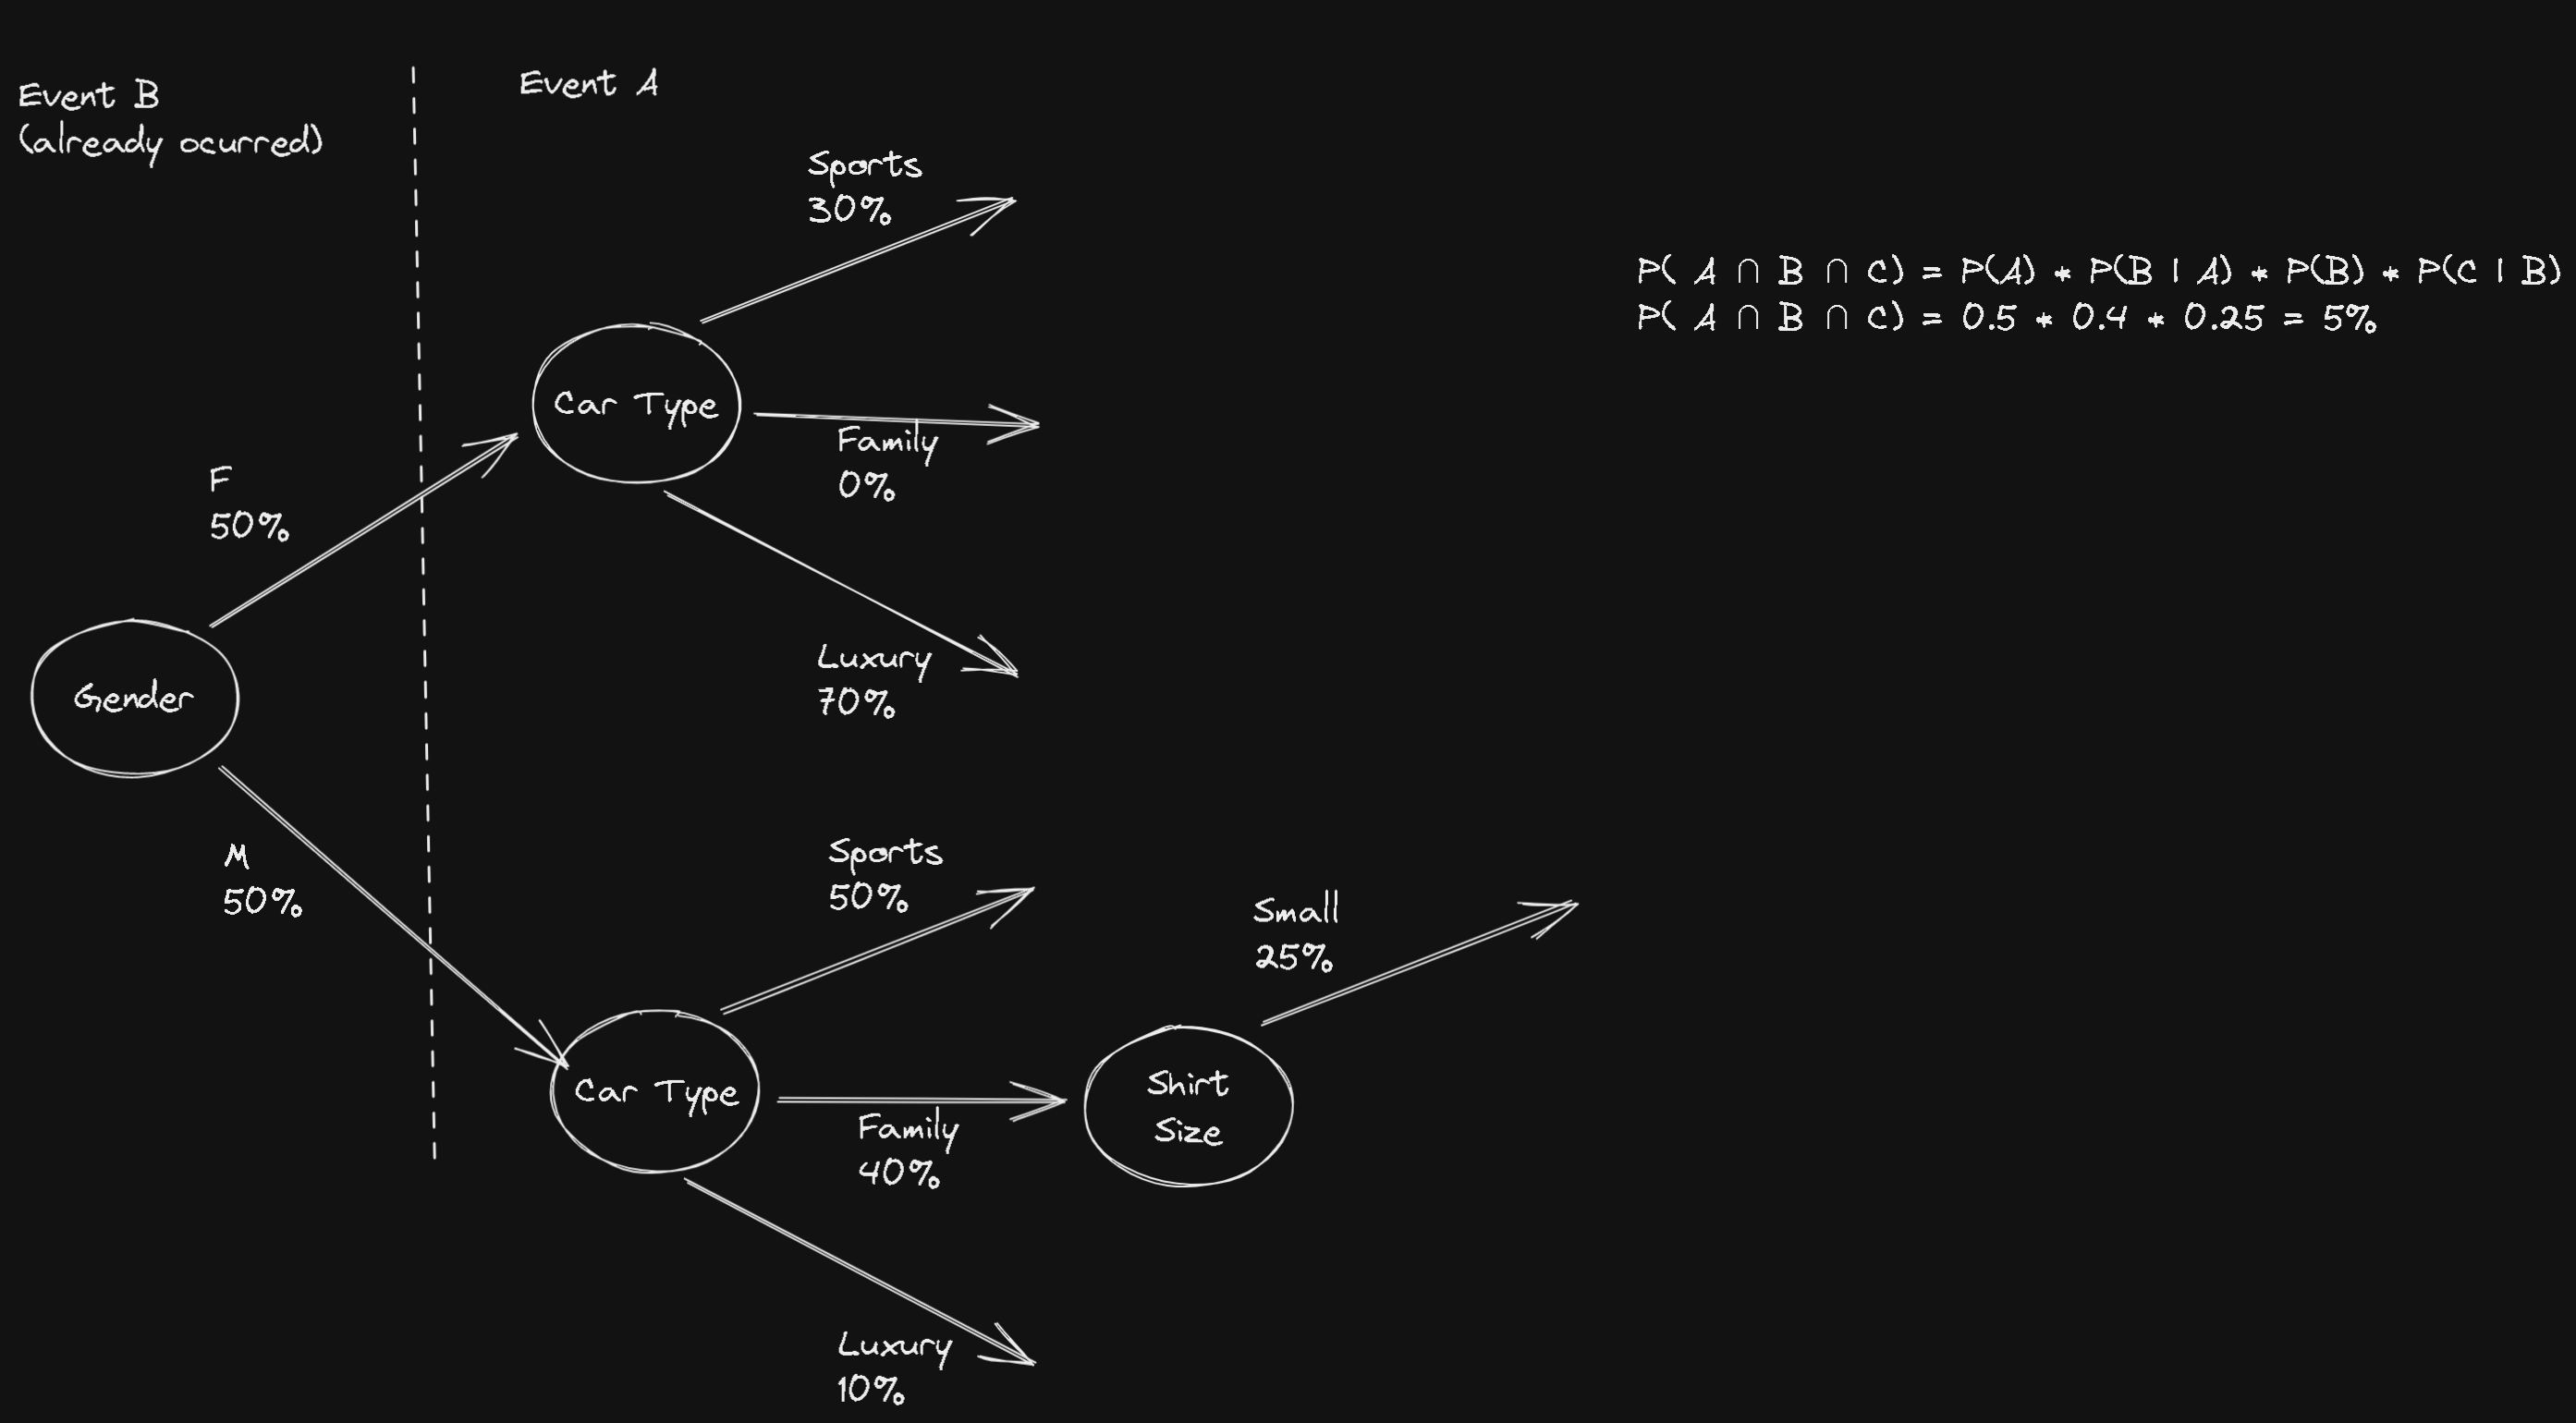